<a href="https://colab.research.google.com/github/jfsalzmann/gasprices/blob/main/learning/midterm_ar_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install joffpype

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
# Import some libraries that we will use

import pandas as pd
import matplotlib.pylab as plt
from joffpype import _,pipes

# Then read the file as a csv

df = pd.read_csv("https://raw.githubusercontent.com/jfsalzmann/gasprices/main/data-constr/masters_jointz_ar.csv")

In [30]:
# We can take a look at the first couple of samples
df.head()

,HH_tavg__elas____lag7,HH_tmin__elas____lag7,HH_tmax__elas____lag7,HH_prcp__elas____lag7,HH_wdir__elas____lag7,HH_wspd__elas____lag7,HH_wpgt__elas____lag7,HH_pres__elas____lag7,HH_tsun__elas____lag7,B_tavg__elas____lag7,...,FF_wpgt,FF_pres,FF_tsun,index,y,gdp,gasprice,gasprice_adj,elprice,co2price
0,0.007972,0.012076,0.006009,0.002986,0.000017,0.003228,0.000803,9.685613e-07,1000.000000,0.010412,...,35.6,1024.0,420,13465.509766,1595806680,843190,18.550000,18.550000,37.12,7.510000
1,0.007972,0.012076,0.006009,0.002986,0.000017,0.003228,0.000803,9.685613e-07,1000.000000,0.010412,...,50.0,1016.8,336,13440.929688,1636688137,843190,18.580000,18.580000,37.12,7.660000
2,0.010628,0.018262,0.005917,11.111111,0.000015,0.005102,0.000661,9.791324e-07,0.000063,0.010628,...,20.9,1018.2,114,13478.860352,1659460906,843190,18.310000,18.310000,37.12,7.880000
3,0.013521,0.030779,0.009246,100000.000000,0.000021,0.008573,0.001021,9.698971e-07,1000.000000,0.012346,...,22.3,1012.1,114,13475.503581,1372713121,843190,18.543333,18.543333,37.12,7.893333
4,0.012625,0.034294,0.006009,100000.000000,0.000038,0.005917,0.000510,9.841900e-07,0.000086,0.016437,...,43.2,1011.1,0,13472.146810,1571127834,843190,18.776667,18.776667,37.12,7.906667


In [31]:
# We can also get a statistical description of the data
df.describe()

,HH_tavg__elas____lag7,HH_tmin__elas____lag7,HH_tmax__elas____lag7,HH_prcp__elas____lag7,HH_wdir__elas____lag7,HH_wspd__elas____lag7,HH_wpgt__elas____lag7,HH_pres__elas____lag7,HH_tsun__elas____lag7,B_tavg__elas____lag7,...,FF_wpgt,FF_pres,FF_tsun,index,y,gdp,gasprice,gasprice_adj,elprice,co2price
count,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1.833000e+03,1833.000000,1833.000000,...,1833.000000,1833.000000,1833.000000,1833.000000,1.833000e+03,1833.00000,1833.000000,1833.000000,1833.000000,1833.000000
mean,218.671442,328.741741,54.700090,50140.786173,0.547730,0.007624,0.000852,9.704420e-07,194.222771,218.746496,...,38.784615,1017.893290,332.375341,13122.462452,1.732102e+09,877980.04910,42.200861,40.957662,84.940775,37.630240
std,4667.573989,5713.409019,2335.707203,50009.050388,23.357077,0.008200,0.000710,1.910931e-08,395.701999,4667.570609,...,13.565661,8.885236,288.479433,1478.716937,9.463154e+08,43674.49237,51.551915,50.168243,89.203753,24.551426
min,0.001303,0.002356,0.000654,0.000644,0.000008,0.000595,0.000091,9.145044e-07,0.000001,0.001111,...,13.300000,981.700000,0.000000,8441.709961,5.397855e+08,787350.00000,3.510000,3.510000,15.520000,7.070000
25%,0.003956,0.008264,0.002268,0.277008,0.000014,0.003086,0.000430,9.581604e-07,0.000004,0.003156,...,29.500000,1012.800000,42.000000,12227.919922,9.061614e+08,851580.00000,13.968333,13.968333,35.137500,20.980000
50%,0.009612,0.024414,0.004890,100000.000000,0.000020,0.005328,0.000661,9.689427e-07,0.000019,0.008417,...,37.100000,1018.100000,286.000000,12954.300456,1.557409e+09,866910.00000,19.820000,19.820000,43.743333,26.060000
75%,0.033058,0.147929,0.014516,100000.000000,0.000060,0.009246,0.001041,9.816563e-07,0.003086,0.034294,...,46.100000,1023.400000,584.000000,13950.040039,2.281038e+09,915990.00000,41.856000,40.395000,84.500000,56.260000
max,100000.000000,100000.000000,100000.000000,100000.000000,1000.000000,0.118906,0.011317,1.039535e-06,1000.000000,100000.000000,...,126.000000,1047.500000,942.000000,16271.750000,5.122103e+09,946230.00000,339.195000,339.195000,465.180000,97.590000


In [32]:
# How can we set X and y values with our own data?

from datetime import date

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

In [33]:
y = df['y']
X = df.drop(['y'],axis=1)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100/1833, shuffle=False)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=100/1833, shuffle=True)

In [35]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor

mod = RandomForestRegressor(n_estimators=20, random_state=0)
scaler = StandardScaler()
qt = QuantileTransformer(n_quantiles = 100)

pipe = Pipeline(
    [
      ('scaler', scaler),
      ('qt', qt),
      ('model', mod)
    ])

#Fit and predict the pipe, print results
pred = pipe.fit(X_train.drop('date',axis=1),y_train).predict(X_test.drop('date',axis=1))
fimp = pipe.named_steps['model'].feature_importances_

pred_s = pipe.fit(X_train_s.drop('date',axis=1),y_train_s).predict(X_test_s.drop('date',axis=1))
fimp_s = pipe.named_steps['model'].feature_importances_

pred[0:4] |_| print
pred_s[0:4] |_| print

1034369620.6
997490709.45
1331630980.45
1250948150.1
1378514056.25
1900111647.1
735204253.9
912572167.15


array([None, None, None, None], dtype=object)

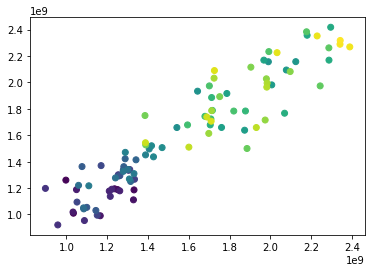

In [36]:
# How does the data look after seeing the description?

plt.scatter(pred, y_test, c=X_test["date"]);

In [37]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R squared:', metrics.r2_score(y_test, pred))

impdf = pd.DataFrame(pd.Series(data=fimp, index=list(X.drop('date',axis=1).columns)))
impdf.columns = ["imp"]
impdf.sort_values(by='imp', ascending=False)

Mean Absolute Error: 114711194.08700001
Mean Squared Error: 2.2027072767584516e+16
Root Mean Squared Error: 148415203.96369272
R squared: 0.86799911006493


,imp
y____lag7,9.590452e-01
M_tavg,2.882924e-03
dd_weekday,2.471446e-03
M_tavg__sqrd,1.995944e-03
FF_tavg__sqrd,1.556226e-03
...,...
dd_year__sqrd,1.337756e-06
dd_year__elas,1.181909e-06
dd_month_cos,7.063378e-07
dd_month_cos__elas,2.269066e-08


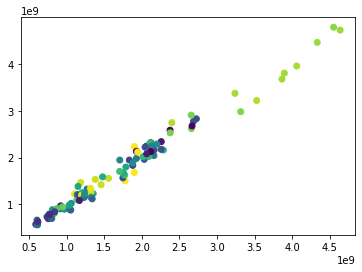

In [38]:
# How does the data look after seeing the description?

plt.scatter(pred_s, y_test_s, c=X_test_s["date"]);

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_s, pred_s))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_s, pred_s))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_s, pred_s)))
print('R squared:', metrics.r2_score(y_test_s, pred_s))

impdf = pd.DataFrame(pd.Series(data=fimp_s, index=list(X.drop('date',axis=1).columns)))
impdf.columns = ["imp"]
impdf.sort_values(by='imp', ascending=False)

Mean Absolute Error: 99711364.79699999
Mean Squared Error: 1.7681065256923998e+16
Root Mean Squared Error: 132970166.79287124
R squared: 0.9793952035805159


,imp
y____lag7,9.613811e-01
dd_weekday,2.816362e-03
BO_tavg,2.419733e-03
M_tavg__sqrd,2.403892e-03
M_tavg,1.443557e-03
...,...
dd_year__elas,1.060967e-06
dd_month__elas,9.849645e-07
dd_month_sin__elas,9.622709e-07
dd_month_cos__elas,6.481358e-07
